In [1]:
import numpy as np
import pandas as pd

import math

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Dataset Source:
https://www.kaggle.com/datasets/kboghe/android-apps-metadata?select=Android+apps+csv.csv

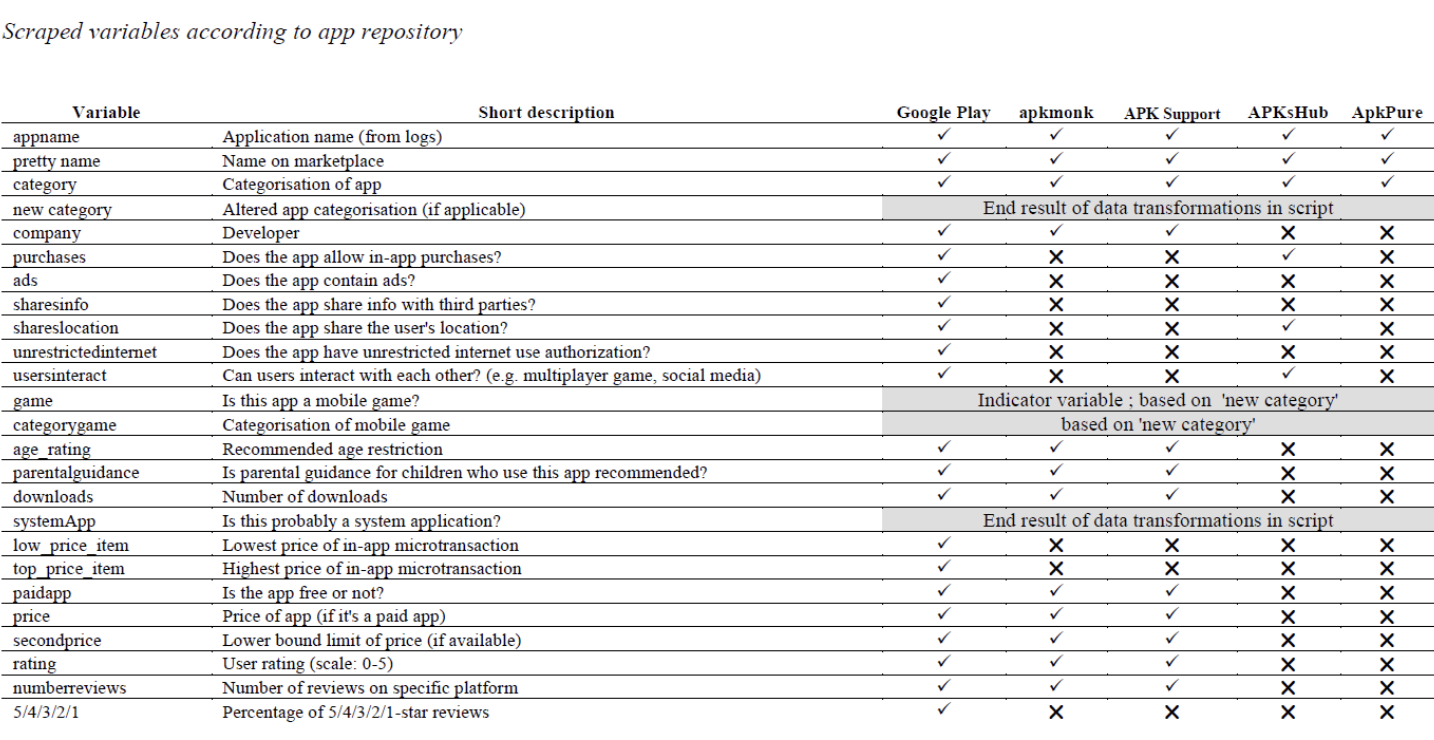

In [3]:
app_meta_df = pd.read_csv('./android_apps.csv')
app_meta_df.head()

/var/folders/_1/wfdz5x1x2f37_s1jvc8855bc0000gp/T/ipykernel_99780/2320718615.py:1: DtypeWarning: Columns (6,7,8,9,10,11,14,21,22,25) have mixed types. Specify dtype option on import or set low_memory=False.
  app_meta_df = pd.read_csv('./android_apps.csv')


,appname,fancyname,category,company,extrainfo,source,purchases,ads,sharesinfo,shareslocation,...,price,secondprice,paidapp,rating,numberreviews,five,four,three,two,one
0,com.netflix.mediaclient,Netflix,entertainment,"netflix, inc.","offers in-app purchases \ august 19, 2019 \ va...",google play,1,0,0,0,...,free,NaN,0,4.5,"7,287,852",100,13,4,2,9
1,com.facebook.orca,Messenger – Text and Video Chat for Free,communication,facebook,"offers in-app purchases \ august 20, 2019 \ va...",google play,1,0,0,1,...,free,NaN,0,4.2,"69,050,158",100,15,9,4,15
2,com.android.chrome,Google Chrome: Fast & Secure,communication,google llc,"august 14, 2019 \ varies with device \ 5,000,0...",google play,0,0,0,0,...,free,NaN,0,4.3,"17,065,648",100,18,9,4,10
3,com.google.android.gm,Gmail,communication,google llc,"contains ads \ august 19, 2019 \ varies with d...",google play,0,1,0,0,...,free,NaN,0,4.4,"6,272,191",100,16,7,3,9
4,com.grindrapp.android,Grindr - Gay chat,social,grindr llc,contains ads·offers in-app purchases \ august ...,google play,1,1,0,0,...,free,NaN,0,3.5,"365,432",100,21,17,12,53


In [4]:
app_meta_df.shape

(50217, 33)

In [5]:
app_meta_df[app_meta_df.duplicated(subset=['fancyname','company'], keep=False)].sort_values(by='fancyname')

,appname,fancyname,category,company,extrainfo,source,purchases,ads,sharesinfo,shareslocation,...,price,secondprice,paidapp,rating,numberreviews,five,four,three,two,one
29491,com.banyac.midrive.app.intl,70mai,auto & vehicles,"70mai co.,ltd","september 12, 2019 \ 30m \ 100,000+ \ 1.3.2 \ ...",google play,0,0,0,0,...,free,NaN,0,3.8,"2,452",100,36,15,11,30
39926,com.banyac.midrive.app,70mai,auto & vehicles,"70mai co.,ltd",auto & vehicles| | |,apkpure,no info,no info,no info,no info,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10199,com.baidu.searchbox,<U+767E><U+5EA6>,tools,mobile cloud&finance,"july 31, 2019 \ 81m \ 1,000,000+ \ 11.12.0.10 ...",google play,0,0,0,0,...,free,NaN,0,3.7,"16,258",100,18,11,5,42
50162,com.baidu.appsearch,<U+767E><U+5EA6>,tools,mobile cloud&finance,"july 31, 2019 \ 81m \ 1,000,000+ \ 11.12.0.10 ...",google play,0,0,0,0,...,free,NaN,0.0,3.7,"16,258",100,18,11,5,42
50101,oem.antivirus,AVG AntiVirus 2019 for Android Security Free,tools,avg mobile,contains ads·offers in-app purchases \ august ...,google play,1,1,0,0,...,free,NaN,0.0,4.7,"6,632,282",100,16,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49628,org.billthefarmer.editor,text editor,tools,no info,1+ downloads app size free price|na,apksupport,no info,no info,no info,no info,...,no info available,NaN,0.0,rating disabled,rating disabled,rating disabled,rating disabled,rating disabled,rating disabled,rating disabled
50206,org.billthefarmer.siggen,text editor,tools,no info,1+ downloads app size free price|na,apksupport,no info,no info,no info,no info,...,no info available,NaN,0.0,rating disabled,rating disabled,rating disabled,rating disabled,rating disabled,rating disabled,rating disabled
23863,org.chromium.chrome,NaN,tools,no company info given,access coarse location access fine location ac...,apkshub,0,no info,no info,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39938,ru.IuFuVuqC.zUtiIVCIm,NaN,tools,no company info given,Access wifi state Bluetooth com.android.vendin...,apkshub,1,no info,no info,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
app_meta_df[app_meta_df.duplicated(subset=['fancyname','company'], keep=False)].shape

(3494, 33)

In [7]:
app_meta_df.shape

(50217, 33)

In [8]:
app_meta_df.columns

Index(['appname', 'fancyname', 'category', 'company', 'extrainfo', 'source',
       'purchases', 'ads', 'sharesinfo', 'shareslocation',
       'unrestrictedinternet', 'usersinteract', 'game', 'age_rating',
       'Parentalguidance', 'Downloads', 'FuzzyMatched', 'basename',
       'SystemApp', 'New.category', 'categorygame', 'low_price_item',
       'top_price_item', 'price', 'secondprice', 'paidapp', 'rating',
       'numberreviews', 'five', 'four', 'three', 'two', 'one'],
      dtype='object')

In [9]:
app_meta_df.dtypes

appname                 object
fancyname               object
category                object
company                 object
extrainfo               object
source                  object
purchases               object
ads                     object
sharesinfo              object
shareslocation          object
unrestrictedinternet    object
usersinteract           object
game                     int64
age_rating              object
Parentalguidance        object
Downloads               object
FuzzyMatched             int64
basename                object
SystemApp                int64
New.category            object
categorygame            object
low_price_item          object
top_price_item          object
price                   object
secondprice             object
paidapp                 object
rating                  object
numberreviews           object
five                    object
four                    object
three                   object
two                     object
one     

In [10]:
app_meta_df.isna().sum()

appname                     0
fancyname                   3
category                    2
company                     2
extrainfo                   2
source                      0
purchases                   0
ads                         0
sharesinfo                  0
shareslocation              0
unrestrictedinternet        0
usersinteract               0
game                        0
age_rating                  0
Parentalguidance            0
Downloads                   0
FuzzyMatched                0
basename                    0
SystemApp                   0
New.category                0
categorygame                0
low_price_item          33891
top_price_item          33891
price                     318
secondprice             46540
paidapp                   318
rating                    318
numberreviews             318
five                      318
four                      318
three                     318
two                       318
one                       318
dtype: int

In [11]:
# dropping these for now because I won't be exploring them at this moment
drop_columns = [
    'appname', # deemed not beneficial to EDA
    'fancyname', # deemed not beneficial to EDA
    'company', # deemed not beneficial to EDA
    'extrainfo', # deemed not beneficial to EDA
    'source', # deemed not beneficial to EDA
    'FuzzyMatched', # deemed not beneficial to EDA
    'basename', # deemed not beneficial to EDA
    'low_price_item', # droppped because there are too many missing values
    'top_price_item', # droppped because there are too many missing values
    'secondprice' # droppped because there are too many missing values
]
app_meta_trimmed_df = app_meta_df.drop(drop_columns, axis=1)
pd.set_option('display.max_columns', 200)
app_meta_trimmed_df.head()

,category,purchases,ads,sharesinfo,shareslocation,unrestrictedinternet,usersinteract,game,age_rating,Parentalguidance,Downloads,SystemApp,New.category,categorygame,price,paidapp,rating,numberreviews,five,four,three,two,one
0,entertainment,1,0,0,0,0,0,0,no info,1,"500,000,000",0,entertainment,no game,free,0,4.5,"7,287,852",100,13,4,2,9
1,communication,1,0,0,1,0,1,0,everyone,0,"1,000,000,000",0,communication,no game,free,0,4.2,"69,050,158",100,15,9,4,15
2,communication,0,0,0,0,1,0,0,everyone,0,"5,000,000",0,internet browser,no game,free,0,4.3,"17,065,648",100,18,9,4,10
3,communication,0,1,0,0,0,1,0,everyone,0,"5,000,000",0,mail,no game,free,0,4.4,"6,272,191",100,16,7,3,9
4,social,1,1,0,0,0,1,0,18,0,"10,000,000",0,dating,no game,free,0,3.5,"365,432",100,21,17,12,53


# Unique Values Per Field

In [12]:
[print(f"{x}:\n{app_meta_trimmed_df[x].value_counts()}\n\n") for x in app_meta_trimmed_df.columns]
print('')

category:
tools                      5494
not found in databases     2973
entertainment              2837
productivity               2452
health & fitness           2195
travel & local             2060
education                  1897
music & audio              1851
lifestyle                  1768
photography                1684
sports                     1675
personalization            1616
puzzle                     1541
simulation                 1489
business                   1414
casual                     1186
arcade                     1174
communication              1097
finance                    1004
social                      964
action                      928
maps & navigation           901
books & reference           832
video players & editors     799
news & magazines            770
shopping                    731
role playing                561
strategy                    561
adventure                   552
medical                     511
educational                 49

# Category

In [13]:
app_meta_trimmed_df['category'].value_counts()

tools                      5494
not found in databases     2973
entertainment              2837
productivity               2452
health & fitness           2195
travel & local             2060
education                  1897
music & audio              1851
lifestyle                  1768
photography                1684
sports                     1675
personalization            1616
puzzle                     1541
simulation                 1489
business                   1414
casual                     1186
arcade                     1174
communication              1097
finance                    1004
social                      964
action                      928
maps & navigation           901
books & reference           832
video players & editors     799
news & magazines            770
shopping                    731
role playing                561
strategy                    561
adventure                   552
medical                     511
educational                 498
racing  

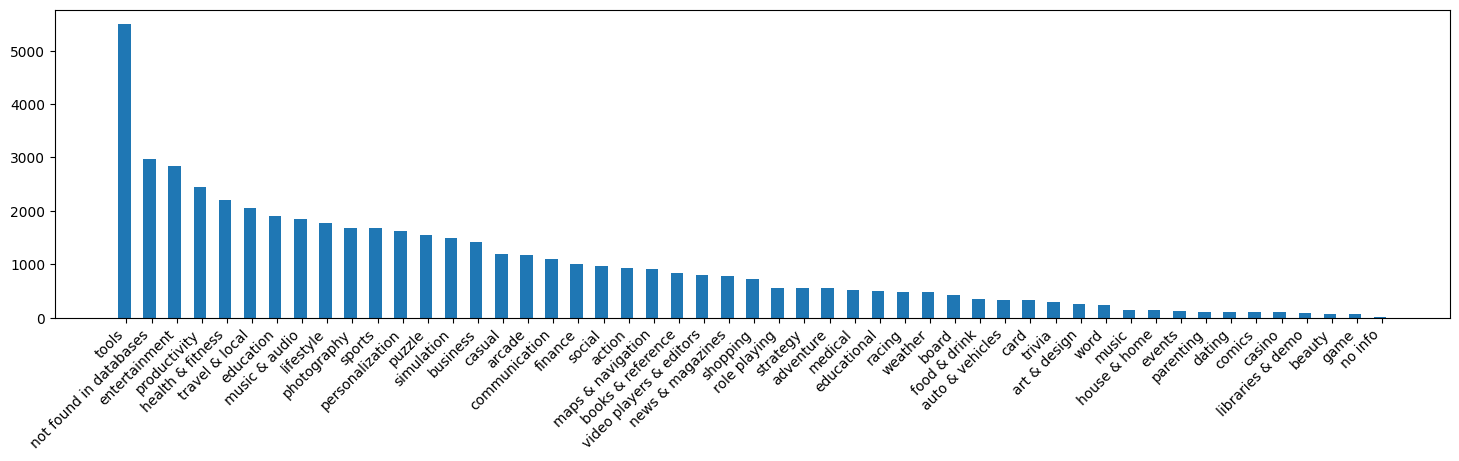

In [14]:
# Redundant code; not sure why putting this in a function doesn't work
field = 'category'
field_values = app_meta_trimmed_df[field].value_counts()
field_names = field_values.index
max_field_values = max(field_values)

fig = plt.figure(figsize=(18,4)) #sets a different size (inches wide, inches tall)
ax = plt.subplot(111)
width=1.0

bar = ax.bar(range(len(field_names)), field_values, width=width/2)

ax.set_xticks(np.arange(0, len(field_names)) + width/2)
ax.set_xticklabels(field_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in bar]

locs, labels = plt.xticks()
_ = plt.xticks(xticks_pos, field_names,  ha='right', rotation=45)

plt.show()

# New Category

In [15]:
app_meta_trimmed_df['New.category'].value_counts()

mobilegame                 11109
tools                       5445
not found in databases      2836
entertainment               2812
productivity                2410
health & fitness            2192
travel & local              2060
music & audio               1924
education                   1897
lifestyle                   1759
photography                 1681
personalization             1610
business                    1396
sports                      1114
finance                     1004
communication                967
social                       951
maps & navigation            901
books & reference            830
video players & editors      786
news & magazines             770
shopping                     731
medical                      511
weather                      475
food & drink                 345
auto & vehicles              337
art & design                 246
internet browser             141
house & home                 138
mail                         129
dating    

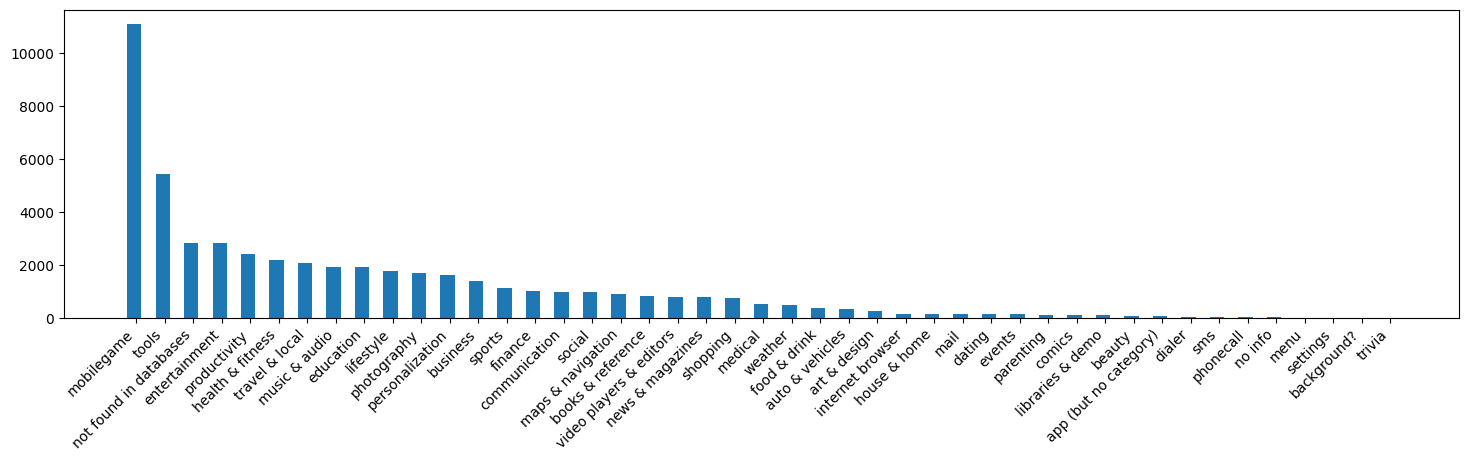

In [16]:
# Redundant code; not sure why putting this in a function doesn't work
field = 'New.category'
field_values = app_meta_trimmed_df[field].value_counts()
field_names = field_values.index
max_field_values = max(field_values)

fig = plt.figure(figsize=(18,4)) #sets a different size (inches wide, inches tall)
ax = plt.subplot(111)
width=1.0

bar = ax.bar(range(len(field_names)), field_values, width=width/2)

ax.set_xticks(np.arange(0, len(field_names)) + width/2)
ax.set_xticklabels(field_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in bar]

locs, labels = plt.xticks()
_ = plt.xticks(xticks_pos, field_names,  ha='right', rotation=45)

plt.show()

# Category Game

In [17]:
app_meta_trimmed_df['categorygame'].value_counts()

no game                   36045
not found in databases     3063
puzzle                     1541
simulation                 1489
casual                     1186
arcade                     1174
action                      928
strategy                    561
role playing                561
sports                      561
adventure                   552
educational                 498
racing                      476
board                       416
card                        336
trivia                      288
word                        234
music                       145
casino                       99
unknown genre game           64
Name: categorygame, dtype: int64

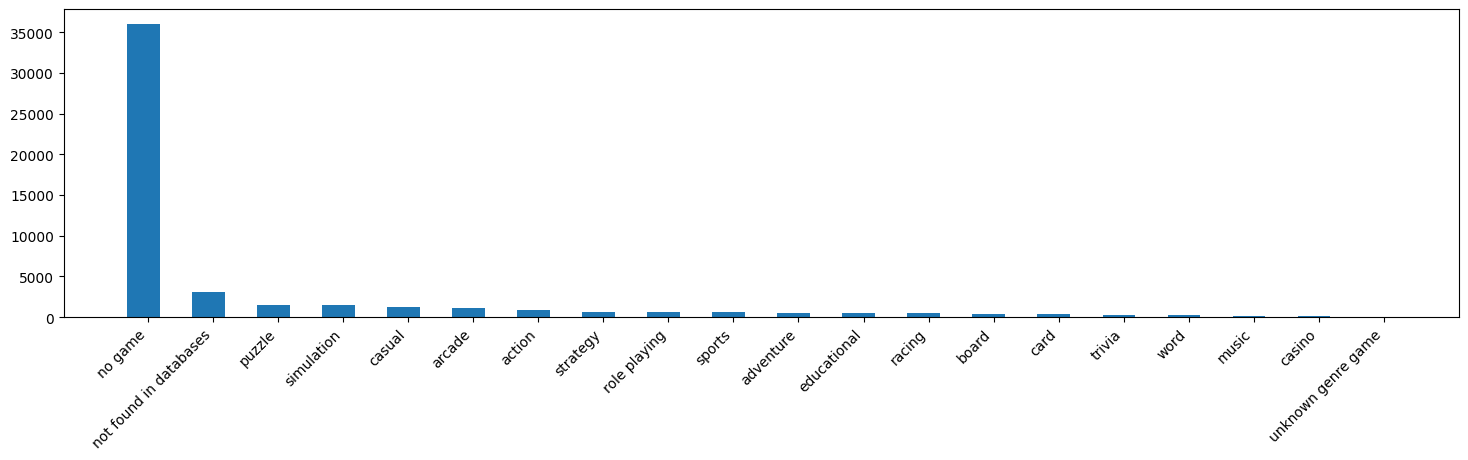

In [18]:
# Redundant code; not sure why putting this in a function doesn't work
field = 'categorygame'
field_values = app_meta_trimmed_df[field].value_counts()
field_names = field_values.index
max_field_values = max(field_values)

fig = plt.figure(figsize=(18,4)) #sets a different size (inches wide, inches tall)
ax = plt.subplot(111)
width=1.0

bar = ax.bar(range(len(field_names)), field_values, width=width/2)

ax.set_xticks(np.arange(0, len(field_names)) + width/2)
ax.set_xticklabels(field_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in bar]

locs, labels = plt.xticks()
_ = plt.xticks(xticks_pos, field_names,  ha='right', rotation=45)

plt.show()

# Age Rating

In [19]:
app_meta_trimmed_df['age_rating'].value_counts()

everyone                  39608
not found in databases     3061
12                         2785
no info                    2544
7                           969
16                          659
18                          591
Name: age_rating, dtype: int64

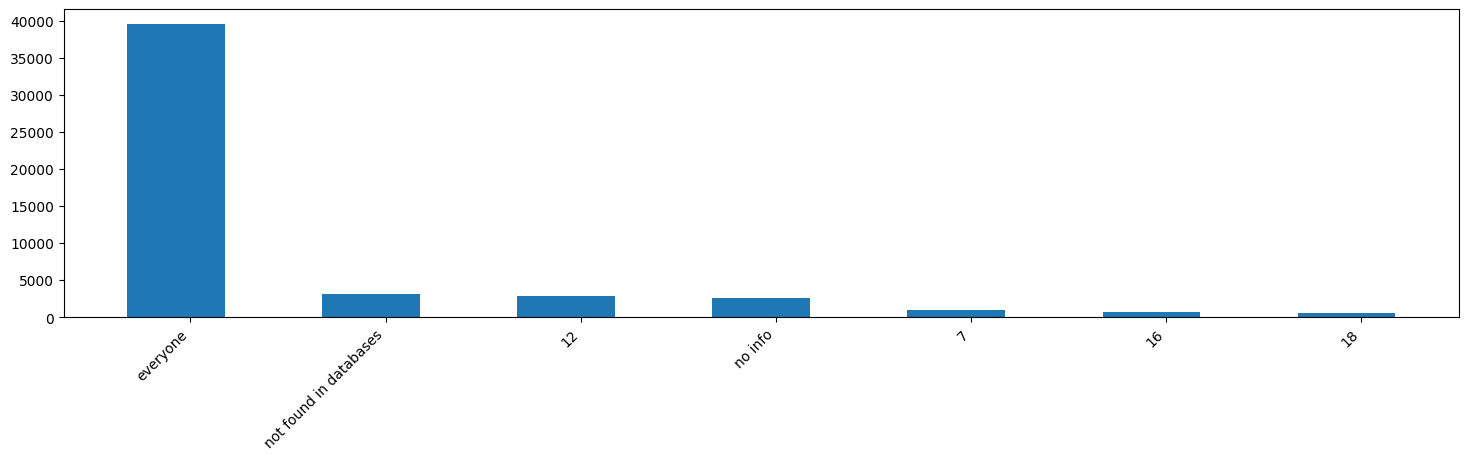

In [20]:
# Redundant code; not sure why putting this in a function doesn't work
field = 'age_rating'
field_values = app_meta_trimmed_df[field].value_counts()
field_names = field_values.index
max_field_values = max(field_values)

fig = plt.figure(figsize=(18,4)) #sets a different size (inches wide, inches tall)
ax = plt.subplot(111)
width=1.0

bar = ax.bar(range(len(field_names)), field_values, width=width/2)

ax.set_xticks(np.arange(0, len(field_names)) + width/2)
ax.set_xticklabels(field_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in bar]

locs, labels = plt.xticks()
_ = plt.xticks(xticks_pos, field_names,  ha='right', rotation=45)

plt.show()

# Rating

In [21]:
app_meta_trimmed_df['rating'].value_counts()

4.3                       3843
4.4                       3736
4.5                       3596
4.2                       3490
not found in databases    3061
4.6                       3010
4.1                       2992
rating disabled           2715
4.0                       2673
3.9                       2182
3.8                       1972
4.7                       1961
3.7                       1528
3.6                       1361
3.5                       1237
4.8                       1013
3.4                        996
3.2                        850
3.3                        842
error during scraping      747
3.1                        694
3.0                        681
2.9                        561
5.0                        548
2.8                        503
2.7                        422
2.5                        356
2.6                        334
2.4                        279
2.3                        278
4.9                        241
2.2                        226
2.0     

In [22]:
numeric_rating = pd.to_numeric(
        app_meta_trimmed_df['rating'],
        errors='coerce'
    ).fillna(-1).astype(np.float64)
numeric_rating.value_counts()

-1.0    6841
 4.3    3843
 4.4    3736
 4.5    3596
 4.2    3490
 4.6    3010
 4.1    2992
 4.0    2673
 3.9    2182
 3.8    1972
 4.7    1961
 3.7    1528
 3.6    1361
 3.5    1237
 4.8    1013
 3.4     996
 3.2     850
 3.3     842
 3.1     694
 3.0     681
 2.9     561
 5.0     548
 2.8     503
 2.7     422
 2.5     356
 2.6     334
 2.4     279
 2.3     278
 4.9     241
 2.2     226
 2.0     205
 2.1     184
 1.9     122
 1.8     111
 1.6      87
 1.7      83
 1.5      52
 1.4      36
 1.3      31
 1.2      29
 1.0      23
 1.1       8
Name: rating, dtype: int64

<Axes: >

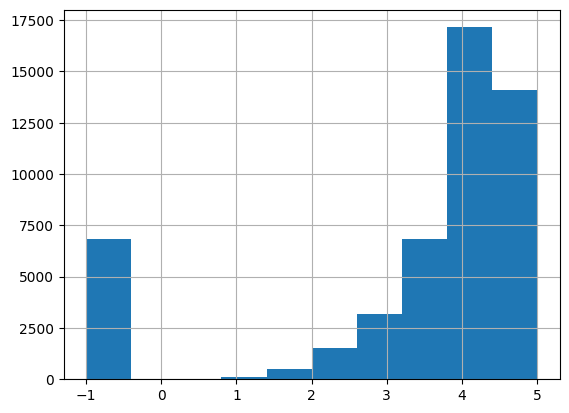

In [23]:
numeric_rating.hist()

# Binary(ish) Categories

- purchases
- ads
- sharesinfo
- shareslocation
- unrestrictedinternet
- usersinteract
- game
- Parentalguidance
- SystemApp

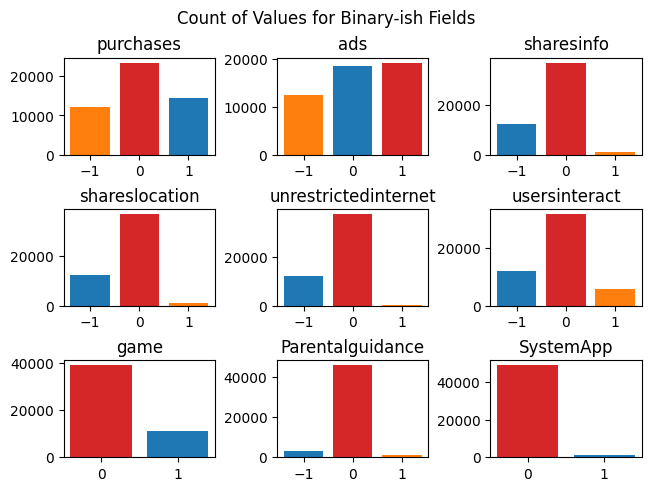

In [24]:
binaryish_categories = [
    'purchases','ads','sharesinfo','shareslocation','unrestrictedinternet',
    'usersinteract','game','Parentalguidance','SystemApp'
]

fig, axs = plt.subplots(nrows=3, ncols=3, constrained_layout=True)
fig.suptitle('Count of Values for Binary-ish Fields')
bar_colors = ['tab:red', 'tab:blue','tab:orange']

for i in range(0, len(binaryish_categories)):
    field = binaryish_categories[i]
    field_axs = axs[int(i/3)][i%3]
    
    field_axs.set_title(field)
    
    numeric_field = pd.to_numeric(
        app_meta_trimmed_df[field],
        errors='coerce'
    ).fillna(-1).astype(np.int64)
    
    field_axs.bar(
        numeric_field.value_counts().index,
        numeric_field.value_counts(),
        color=bar_colors
    )

# Downloads

In [25]:
app_meta_trimmed_df['Downloads'].value_counts()

100,000                   7679
1,000,000                 6930
10,000                    5410
1,000                     3558
500,000                   3450
not found in databases    3061
50,000                    2930
10,000,000                2579
5,000,000                 2117
5,000                     1749
10+ thousand              1526
100                       1351
100+ thousand             1318
500                        998
1000+ thousand             840
50+ thousand               621
5+ thousand                493
10                         486
500+ thousand              475
50,000,000                 434
50                         335
100,000,000                328
no info                    314
10+ million                254
error during scraping      218
5+ million                 213
1                          194
5                          116
0                           83
500,000,000                 52
50+ million                 38
1,000,000,000               37
100+ mil

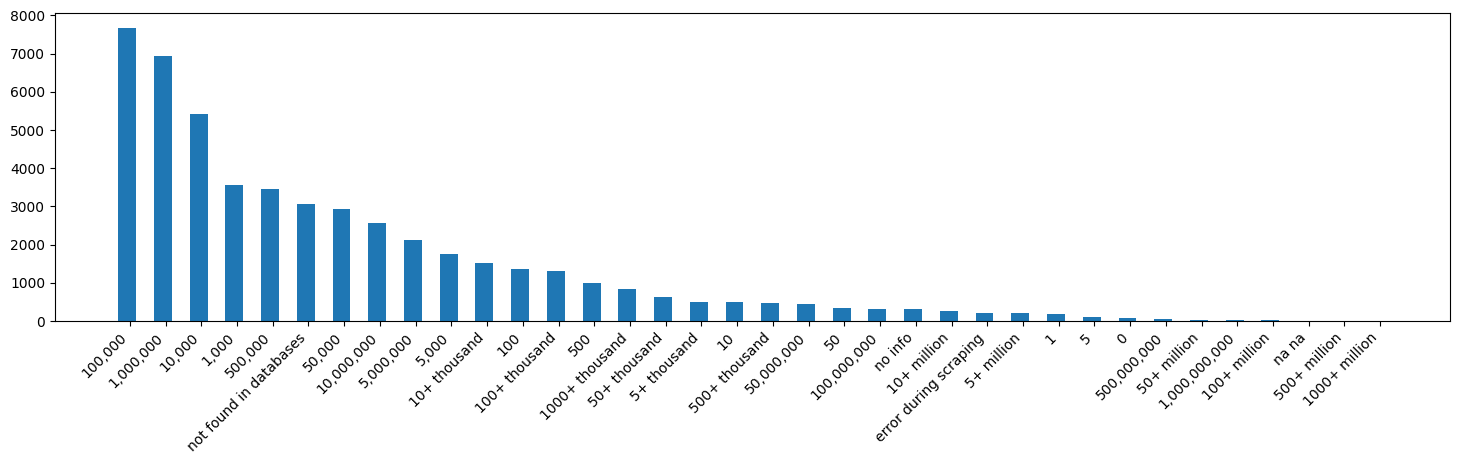

In [26]:
# Redundant code; not sure why putting this in a function doesn't work
field = 'Downloads'
field_values = app_meta_trimmed_df[field].value_counts()
field_names = field_values.index
max_field_values = max(field_values)

fig = plt.figure(figsize=(18,4)) #sets a different size (inches wide, inches tall)
ax = plt.subplot(111)
width=1.0

bar = ax.bar(range(len(field_names)), field_values, width=width/2)

ax.set_xticks(np.arange(0, len(field_names)) + width/2)
ax.set_xticklabels(field_names)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in bar]

locs, labels = plt.xticks()
_ = plt.xticks(xticks_pos, field_names,  ha='right', rotation=45)

plt.show()

In [27]:
numeric_downloads = app_meta_trimmed_df['Downloads'].copy()
for i in numeric_downloads.index:
    value = numeric_downloads[i]
    value=''.join(value.split())
    if value.replace(',', '').isdigit():
        numeric_downloads[i] = int(value.replace(',', ''))
    elif value == '10+thousand':
        numeric_downloads[i] = 10_000
    elif value == '100+thousand':
        numeric_downloads[i] = 100_000
    elif value == '1000+thousand':
        numeric_downloads[i] = 1_000_000
    elif value == '50+thousand':
        numeric_downloads[i] = 50_000
    elif value == '5+thousand':
        numeric_downloads[i] = 5_000
    elif value == '500+thousand':
        numeric_downloads[i] = 500_000
    elif value == '10+million':
        numeric_downloads[i] = 10_000_000
    elif value == '5+million':
        numeric_downloads[i] = 5_000_000
    elif value == '50+million':
        numeric_downloads[i] = 50_000_000
    elif value == '100+million':
        numeric_downloads[i] = 100_000_000
    elif value == '500+million':
        numeric_downloads[i] = 500_000_000
    elif value == '1000+million':
        numeric_downloads[i] = 1_000_000_000
    else:
        numeric_downloads[i] = -1

In [28]:
numeric_downloads.value_counts()

 100000        8997
 1000000       7770
 10000         6936
 500000        3925
-1             3596
 1000          3558
 50000         3551
 10000000      2833
 5000000       2330
 5000          2242
 100           1351
 500            998
 10             486
 50000000       472
 100000000      353
 50             335
 1              194
 5              116
 0               83
 500000000       53
 1000000000      38
Name: Downloads, dtype: int64

<Axes: >

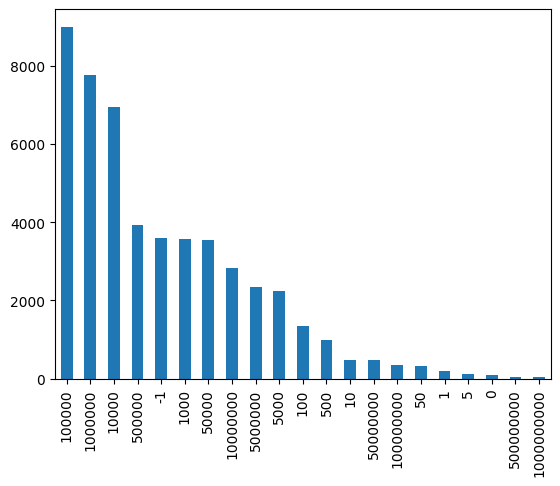

In [31]:
numeric_downloads.value_counts().plot(kind='bar')

In [30]:
# Test Code:
# test = app_meta_trimmed_df['Parentalguidance'].drop_duplicates()
# # type(test)
# pd.DataFrame({
#     'value': [x for x in test],
#     'type': [type(x) for x in test]
# })
# app_meta_trimmed_df.Parentalguidance = pd.to_numeric(
#     app_meta_trimmed_df.Parentalguidance,
#     errors='coerce').fillna(-1).astype(np.int64)
# app_meta_trimmed_df.Parentalguidance.value_counts()